In [1]:
#%pip install Pandas-Profiling
#%pip install ipywidgets
#%pip install xlrd
#%pip install pyjanitor
#%pip install configparser
#%pip install sklearn
#%pip install yellowbrick
#%pip install matplotlib

In [2]:
import pandas_profiling
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import pandas as pd
import numpy
from sklearn import (ensemble, model_selection, preprocessing, tree)
from sklearn import impute
from sklearn import metrics
from sklearn.metrics import (auc, confusion_matrix, roc_auc_score, roc_curve)
from sklearn.model_selection import (train_test_split, StratifiedKFold)
from sklearn.experimental import (enable_iterative_imputer)
from sklearn.dummy import DummyClassifier
from yellowbrick.classifier import (ConfusionMatrix, ROCAUC)
from yellowbrick.model_selection import (LearningCurve)
import janitor as jn

In [3]:
# URL que contém o dado. Página 25.
url = ("https://biostat.app.vumc.org/wiki/pub/Main/DataSets/titanic3.xls")

In [4]:
# Página 25.
# Leitura do arquivo.
df = pd.read_excel(url)
# Cria uma cópia do DataFrame.
orig_df = df

In [5]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [6]:
# Página 26.
df.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [7]:
# Página 27.
# Gera um relatório sobre o DataFrame.
#pandas_profiling.ProfileReport(df)

In [8]:
# Página 27.
# Número de linhas e colunas.
df.shape

(1309, 14)

In [9]:
# Página 29.
df.describe().iloc[:, :2]

,pclass,survived
count,1309.000000,1309.000000
mean,2.294882,0.381971
std,0.837836,0.486055
min,1.000000,0.000000
25%,2.000000,0.000000
50%,3.000000,0.000000
75%,3.000000,1.000000
max,3.000000,1.000000


In [10]:
# Página 29.
# Número de dados ausentes.
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [11]:
# Página 30
# Porcentagem de dados ausentes.
df.isnull().mean()

pclass       0.000000
survived     0.000000
name         0.000000
sex          0.000000
age          0.200917
sibsp        0.000000
parch        0.000000
ticket       0.000000
fare         0.000764
cabin        0.774637
embarked     0.001528
boat         0.628724
body         0.907563
home.dest    0.430863
dtype: float64

In [12]:
# Página 30.
# Contadores dos atributos ausentes em cada amostra.
df.isnull().sum(axis=1).loc[:10]

0     1
1     1
2     2
3     1
4     2
5     1
6     1
7     2
8     1
9     2
10    1
dtype: int64

In [13]:
# Página 31.
# Informa se a linha contém dados ausentes ou não.
mask = df.isnull().any(axis=1)

In [14]:
# Página 31.
mask.head()

0    True
1    True
2    True
3    True
4    True
dtype: bool

In [15]:
# Página 31.
df[mask].body.head()

0      NaN
1      NaN
2      NaN
3    135.0
4      NaN
Name: body, dtype: float64

In [16]:
# Página 32.
# Contagem na coluna "age".
df.sex.value_counts(dropna=False)

male      843
female    466
Name: sex, dtype: int64

In [17]:
# Página 32.
df.embarked.value_counts(dropna=False)

S      914
C      270
Q      123
NaN      2
Name: embarked, dtype: int64

In [18]:
# Página 33.
name = df.name

In [19]:
# Página 33.
name.head(3)

0     Allen, Miss. Elisabeth Walton
1    Allison, Master. Hudson Trevor
2      Allison, Miss. Helen Loraine
Name: name, dtype: object

In [20]:
# Página 33.
df = df.drop(columns=["name", "ticket", "home.dest", "boat", "body", "cabin"])

In [21]:
df

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S
2,1,0,female,2.0000,1,2,151.5500,S
3,1,0,male,30.0000,1,2,151.5500,S
4,1,0,female,25.0000,1,2,151.5500,S
...,...,...,...,...,...,...,...,...
1304,3,0,female,14.5000,1,0,14.4542,C
1305,3,0,female,NaN,1,0,14.4542,C
1306,3,0,male,26.5000,0,0,7.2250,C
1307,3,0,male,27.0000,0,0,7.2250,C


In [22]:
# Página 33.
# Criação de coluna dummy.
df = pd.get_dummies(df)

In [23]:
df

,pclass,survived,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1,1,29.0000,0,0,211.3375,1,0,0,0,1
1,1,1,0.9167,1,2,151.5500,0,1,0,0,1
2,1,0,2.0000,1,2,151.5500,1,0,0,0,1
3,1,0,30.0000,1,2,151.5500,0,1,0,0,1
4,1,0,25.0000,1,2,151.5500,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,14.5000,1,0,14.4542,1,0,1,0,0
1305,3,0,NaN,1,0,14.4542,1,0,1,0,0
1306,3,0,26.5000,0,0,7.2250,0,1,1,0,0
1307,3,0,27.0000,0,0,7.2250,0,1,1,0,0


In [24]:
# Página 33.
df.columns

Index(['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'sex_female',
       'sex_male', 'embarked_C', 'embarked_Q', 'embarked_S'],
      dtype='object')

In [25]:
# Página 34.
df = df.drop(columns="sex_male")

In [26]:
df

,pclass,survived,age,sibsp,parch,fare,sex_female,embarked_C,embarked_Q,embarked_S
0,1,1,29.0000,0,0,211.3375,1,0,0,1
1,1,1,0.9167,1,2,151.5500,0,0,0,1
2,1,0,2.0000,1,2,151.5500,1,0,0,1
3,1,0,30.0000,1,2,151.5500,0,0,0,1
4,1,0,25.0000,1,2,151.5500,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1304,3,0,14.5000,1,0,14.4542,1,1,0,0
1305,3,0,NaN,1,0,14.4542,1,1,0,0
1306,3,0,26.5000,0,0,7.2250,0,1,0,0
1307,3,0,27.0000,0,0,7.2250,0,1,0,0


In [27]:
# Página 34.
df = pd.get_dummies(df, drop_first=True)

In [28]:
df

,pclass,survived,age,sibsp,parch,fare,sex_female,embarked_C,embarked_Q,embarked_S
0,1,1,29.0000,0,0,211.3375,1,0,0,1
1,1,1,0.9167,1,2,151.5500,0,0,0,1
2,1,0,2.0000,1,2,151.5500,1,0,0,1
3,1,0,30.0000,1,2,151.5500,0,0,0,1
4,1,0,25.0000,1,2,151.5500,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1304,3,0,14.5000,1,0,14.4542,1,1,0,0
1305,3,0,NaN,1,0,14.4542,1,1,0,0
1306,3,0,26.5000,0,0,7.2250,0,1,0,0
1307,3,0,27.0000,0,0,7.2250,0,1,0,0


In [29]:
# Página 34.
df.columns

Index(['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'sex_female',
       'embarked_C', 'embarked_Q', 'embarked_S'],
      dtype='object')

In [30]:
# Página 34.
y = df.survived
X = df.drop(columns="survived")

In [31]:
y

0       1
1       1
2       0
3       0
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: survived, Length: 1309, dtype: int64

In [32]:
X

,pclass,age,sibsp,parch,fare,sex_female,embarked_C,embarked_Q,embarked_S
0,1,29.0000,0,0,211.3375,1,0,0,1
1,1,0.9167,1,2,151.5500,0,0,0,1
2,1,2.0000,1,2,151.5500,1,0,0,1
3,1,30.0000,1,2,151.5500,0,0,0,1
4,1,25.0000,1,2,151.5500,1,0,0,1
...,...,...,...,...,...,...,...,...,...
1304,3,14.5000,1,0,14.4542,1,1,0,0
1305,3,NaN,1,0,14.4542,1,1,0,0
1306,3,26.5000,0,0,7.2250,0,1,0,0
1307,3,27.0000,0,0,7.2250,0,1,0,0


In [33]:
# Página 34.
# /home/gui/anaconda3/envs/mlharrison/lib/python3.9/site-packages/janitor/utils.py:263: FutureWarning: get_features_targets() has moved. Please use ml.get_features_targets().
# warnings.warn(message, FutureWarning)
#X, y = jn.get_features_targets(df, target_columns="survived")
X, y = jn.ml.get_features_targets(df, target_columns="survived")

In [34]:
X

,pclass,age,sibsp,parch,fare,sex_female,embarked_C,embarked_Q,embarked_S
0,1,29.0000,0,0,211.3375,1,0,0,1
1,1,0.9167,1,2,151.5500,0,0,0,1
2,1,2.0000,1,2,151.5500,1,0,0,1
3,1,30.0000,1,2,151.5500,0,0,0,1
4,1,25.0000,1,2,151.5500,1,0,0,1
...,...,...,...,...,...,...,...,...,...
1304,3,14.5000,1,0,14.4542,1,1,0,0
1305,3,NaN,1,0,14.4542,1,1,0,0
1306,3,26.5000,0,0,7.2250,0,1,0,0
1307,3,27.0000,0,0,7.2250,0,1,0,0


In [35]:
y

0       1
1       1
2       0
3       0
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: survived, Length: 1309, dtype: int64

In [36]:
# Página 35.
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
# Página 35.
num_cols = ["pclass", "age", "sibsp", "parch", "fare", "sex_female"]

In [38]:
# Página 36.
imputer = impute.IterativeImputer()
imputed = imputer.fit_transform(X_train[num_cols])
X_train.loc[:, num_cols] = imputed
imputed = imputer.transform(X_test[num_cols])
X_test.loc[:, num_cols] = imputed

In [39]:
# Página 36.
meds = X_train.median()
X_train = X_train.fillna(meds)
X_test = X_test.fillna(meds)

In [40]:
# Página 36.
#cols = "pclass,age,sibsp,fare".split(",")
#cols
cols = ['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_female', 'embarked_C', 
        'embarked_Q', 'embarked_S']

In [41]:
# Página 36.
sca = preprocessing.StandardScaler()

In [42]:
# Página 37.
X_train = sca.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=cols)
X_test = sca.fit_transform(X_test)
X_test = pd.DataFrame(X_test, columns=cols)

In [43]:
# Página 37.
def tweak_titanic(df):
    df = df.drop(
        columns=[
            "name",
            "ticket",
            "home.dest",
            "boat",
            "body",
            "cabin",
            ]
    ).pipe(pd.get_dummies, drop_first=True)
    return df

In [44]:
# Página 37-38.
def get_train_test_X_y(df, y_col, size=0.3, std_cols=None):
    y = df[y_col]
    X = df.drop(columns=y_col)
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=size, random_state=42)
    cols = X.columns
    num_cols = ["pclass", "age", "sibsp", "parch", "fare"]
    fi = impute.IterativeImputer()
    fitted = fi.fit_transform(X_train[num_cols])
    X_train = X_train.assign(**{c:fitted[:,i] for i, c in enumerate(num_cols)})
    test_fit = fi.transform(X_test[num_cols])
    X_test = X_test.assign(**{c:test_fit[:,i] for i, c in enumerate(num_cols)})
    if std_cols:
        std = preprocessing.StandardScaler()
        fitted = std.fit_transform(X_train[std_cols])
        X_train = X_train.assign(**{c:fitted[:,i] for i, c in enumerate(std_cols)})
        test_fit = std.transform(X_test[std_cols])
        X_test = X_test.assign(**{c:test_fit[:,i] for i, c in enumerate(std_cols)})

    return X_train, X_test, y_train, y_test

In [45]:
# Página 38.
ti_df = tweak_titanic(orig_df)
std_cols = "pclass,age,sibsp,fare".split(",")
X_train, X_test, y_train, y_test = get_train_test_X_y(ti_df, "survived", std_cols=std_cols)

In [46]:
# Página 39.
# Correct result: 0.48346055979643765
# My result: 0.5699745547073791
bm = DummyClassifier()
bm.fit(X_train, y_train)
bm.score(X_test, y_test)

0.5699745547073791

In [47]:
# Correct result: 0.4896551724137931
# My result: 0.0
metrics.precision_score(y_test, bm.predict(X_test))

/home/gui/anaconda3/envs/mlharrison/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [72]:
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])
from sklearn import model_selection
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import (
    LogisticRegression,
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import (
    KNeighborsClassifier,
)
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import (
    RandomForestClassifier,
)
import xgboost

In [74]:
for model in [
    DummyClassifier,
    LogisticRegression,
    DecisionTreeClassifier,
    KNeighborsClassifier,
    GaussianNB,
    SVC,
    RandomForestClassifier,
    xgboost.XGBClassifier,
]:
    cls = model()
    kfold = model_selection.KFold(
        #n_splits=10, random_state=42
        n_splits=10, random_state=None  # GM
    )
    s = model_selection.cross_val_score(
        cls, X, y, scoring="roc_auc", cv=kfold
    )
    print(
        f"{model.__name__:22}  AUC: "
        f"{s.mean():.3f} STD: {s.std():.2f}"
    )

DummyClassifier         AUC: 0.500 STD: 0.00
LogisticRegression      AUC: 0.843 STD: 0.03
DecisionTreeClassifier  AUC: 0.758 STD: 0.03
KNeighborsClassifier    AUC: 0.829 STD: 0.05
GaussianNB              AUC: 0.817 STD: 0.04
SVC                     AUC: 0.837 STD: 0.05
RandomForestClassifier  AUC: 0.848 STD: 0.03
XGBClassifier           AUC: 0.863 STD: 0.04


In [75]:
rf = ensemble.RandomForestClassifier(
    n_estimators=100, random_state=42
)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [76]:
rf.score(X_test, y_test)

0.7837150127226463

In [77]:
metrics.precision_score(
    y_test, rf.predict(X_test)
)

0.7916666666666666

In [78]:
for col, val in sorted(
    zip(
        X_train.columns,
        rf.feature_importances_,
    ),
    key=lambda x: x[1],
    reverse=True,
)[:5]:
    print(f"{col:10}{val:10.3f}")

age            0.285
fare           0.262
sex_male       0.241
pclass         0.089
sibsp          0.050


In [79]:
rf4 = ensemble.RandomForestClassifier()
params = {
    "max_features": [0.4, "auto"],
    "n_estimators": [15, 200],
    "min_samples_leaf": [1, 0.1],
    "random_state": [42],
}
cv = model_selection.GridSearchCV(
    rf4, params, n_jobs=-1
).fit(X_train, y_train)
print(cv.best_params_)

{'max_features': 0.4, 'min_samples_leaf': 1, 'n_estimators': 200, 'random_state': 42}


In [80]:
rf5 = ensemble.RandomForestClassifier(
    **{
        "max_features": "auto",
        "min_samples_leaf": 0.1,
        "n_estimators": 200,
        "random_state": 42,
    }
)
rf5.fit(X_train, y_train)
rf5.score(X_test, y_test)

0.7073791348600509

In [81]:
from sklearn.metrics import confusion_matrix
y_pred = rf5.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[217,   7],
       [108,  61]])

/home/gui/anaconda3/envs/mlharrison/lib/python3.9/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


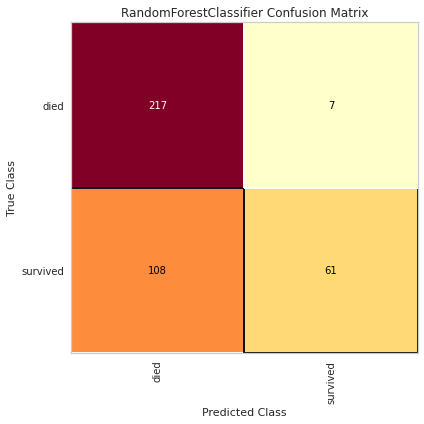

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [82]:
%matplotlib inline

mapping = {0: "died", 1: "survived"}
fig, ax = plt.subplots(figsize=(6, 6))
cm_viz = ConfusionMatrix(
    rf5,
    classes=["died", "survived"],
    label_encoder=mapping,
)
cm_viz.score(X_test, y_test)
cm_viz.poof()

In [83]:
y_pred = rf5.predict(X_test)
roc_auc_score(y_test, y_pred)

0.6648483727810651

/home/gui/anaconda3/envs/mlharrison/lib/python3.9/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


AttributeError: 'RandomForestClassifier' object has no attribute 'target_type_'

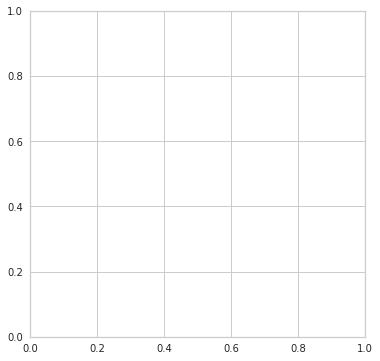

In [89]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(6, 6))
roc_viz = ROCAUC(rf5)
roc_viz.score(X_test, y_test)
roc_viz.poof()
#fig.savefig("images/mlpr_0305.png")

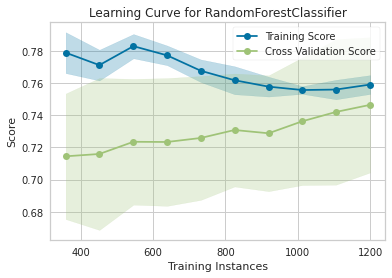

<AxesSubplot:title={'center':'Learning Curve for RandomForestClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [ ]:
%matplotlib inline

import numpy as np
fig, ax = plt.subplots(figsize=(6, 4))
cv = StratifiedKFold(12)
sizes = np.linspace(0.3, 1.0, 10)
lc_viz = LearningCurve(
    rf5,
    cv=cv,
    train_sizes=sizes,
    scoring="f1_weighted",
    n_jobs=4,
    ax=ax,
)
lc_viz.fit(X, y)
lc_viz.poof()

In [ ]:
import pickle
pic = pickle.dumps(rf5)
rf6 = pickle.loads(pic)
y_pred = rf6.predict(X_test)
roc_auc_score(y_test, y_pred)

0.6648483727810651